In [1]:
import pandas as pd
import numpy as np

In [5]:
column_names=['user_id','item_id','rating','timestamp']
main_df=pd.read_csv('movie_data.txt', sep='\t', names=column_names)

In [6]:
main_df.head(10)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [7]:
movie_names=pd.read_csv('movie_names.txt')
movie_names.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [10]:
df=pd.merge(movie_names,main_df, on='item_id')
df.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


# Basic Inferences:

10 worst rated movies.

In [11]:
df.groupby('title')['rating'].mean().sort_values(ascending=True).head(10)

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)         1.0
Butterfly Kiss (1995)                                1.0
Daens (1992)                                         1.0
JLG/JLG - autoportrait de décembre (1994)            1.0
Touki Bouki (Journey of the Hyena) (1973)            1.0
Lotto Land (1995)                                    1.0
Invitation, The (Zaproszenie) (1986)                 1.0
Somebody to Love (1994)                              1.0
Low Life, The (1994)                                 1.0
Police Story 4: Project S (Chao ji ji hua) (1993)    1.0
Name: rating, dtype: float64

10 best rated movies.

In [12]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

10 least rated movies.

In [13]:
df.groupby('title')['rating'].count().sort_values(ascending=True).head(10)

title
Á köldum klaka (Cold Fever) (1994)            1
Mille bolle blu (1993)                        1
Mat' i syn (1997)                             1
Marlene Dietrich: Shadow and Light (1996)     1
Man from Down Under, The (1943)               1
Mamma Roma (1962)                             1
Mad Dog Time (1996)                           1
Big Bang Theory, The (1994)                   1
MURDER and murder (1996)                      1
Coldblooded (1995)                            1
Name: rating, dtype: int64

10 most rated movies.

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

# New dataframe to work on ratings and visualization of the same:

In [16]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [17]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Import pyplot and seaborn:

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

A couple of histograms:

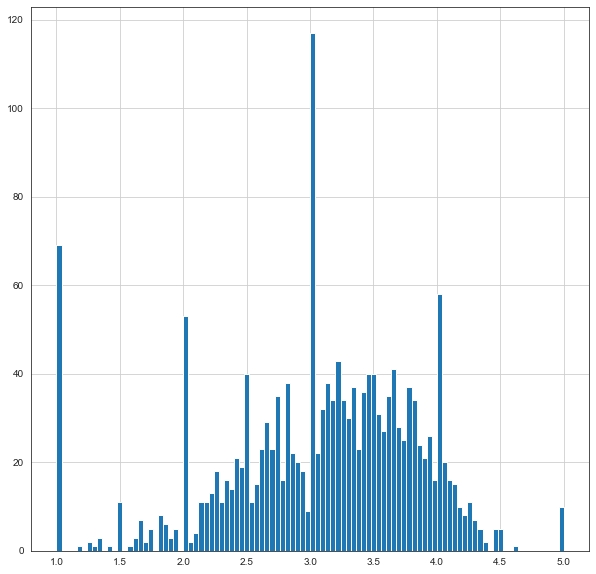

In [19]:
plt.figure(figsize=(10,10))
ratings['rating'].hist(bins=100)

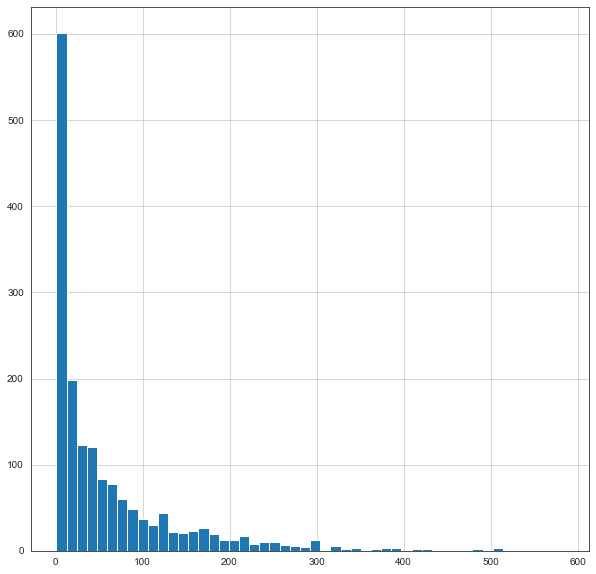

In [21]:
plt.figure(figsize=(10,10))
ratings['num of ratings'].hist(bins=50)

A jointplot:

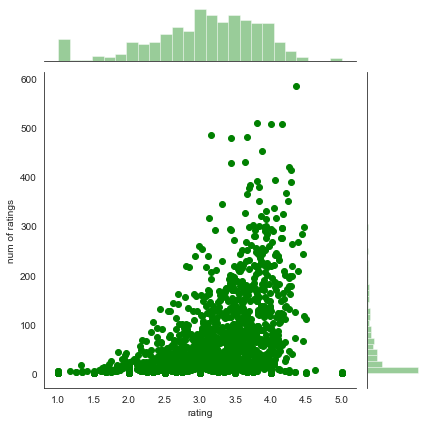

In [24]:
sns.jointplot(x='rating',y='num of ratings',data=ratings, color='g')

# Recommending Similar Movies:

In [25]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   item_id    100003 non-null  int64 
 1   title      100003 non-null  object
 2   user_id    100003 non-null  int64 
 3   rating     100003 non-null  int64 
 4   timestamp  100003 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


Enter Movie name here, a movie that you've waatched and liked to get relevant suggestions!

In [37]:
while(True):
    try:
        presmov=int(input("Enter item_id for the movie you like"))-1
        break
    except:
        print("Wrong Code, Try Again!")
        continue
presmov=movie_names['title'][presmov]
print(presmov)

Enter item_id for the movie you like50
Star Wars (1977)


In [39]:
presmov_ratings=moviemat[presmov]
presmov_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [40]:
presmov_ratings.dropna(inplace=True)
print(presmov_ratings.isnull().sum())

0


In [65]:
presmov_similar=moviemat.corrwith(presmov_ratings)
corr_table=pd.DataFrame(presmov_similar, columns=['Level of Similarity'])
corr_table.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Level of Similarity
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [66]:
corr_table=corr_table.sort_values(by='Level of Similarity', ascending=False)
corr_table.head()

,Level of Similarity
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [68]:
corr_table = corr_table.join(ratings['num of ratings'])
corr_table.head()

,Level of Similarity,num of ratings
title,,
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Man of the Year (1995),1.0,9


In [73]:
fin_sugg=corr_table[corr_table['num of ratings']>50].sort_values('Level of Similarity',ascending=False)

# Resulting Table:

In [74]:
fin_sugg.head(10)

,Level of Similarity,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
"Life Less Ordinary, A (1997)",0.411638,53
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331


# The End. 